In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import wilcoxon

sns.set_style("whitegrid")

## Check controls: in-vitro array, and naked plasmid

#### This plasmid contains a part of the sequence of the ARS305 locus

In [34]:
ls controls/

DIES6_ALL_REP1_in_vitro_nucl_array.txt
DIES6_ALL_REP1_naked_plasmid.txt
DIES6_REP2_780READS_in_vitro_nucl_array.txt
DIES6_rep2_780READS_naked_plasmid.txt
array_disw2_rep1_780READS_noNA.csv
array_disw2_rep2_780READS_noNA.csv
array_disw2_rep2_780READS_noNA_cleaned.csv
in_vitro_nucl_array_(31 .. 2214).fa
mat_Megalodon_repII_in_vitro_nucl_array.txt
naked_plasmid.fa
naked_plasmid_disw2_rep1_780READS.csv
naked_plasmid_disw2_rep2_clean_780_reads.csv
naked_plasmid_wt_rep2_1000reads.txt
unused_csvs/
wt_mat_Megalodon_repIII_in_vitro_nucl_array.txt
wt_mat_Megalodon_repIII_naked_plasmid.txt


In [35]:
wt_rep3_nucarray = np.loadtxt("controls/wt_mat_Megalodon_repIII_in_vitro_nucl_array.txt")
wt_rep3_nucarray.shape

(780, 1966)

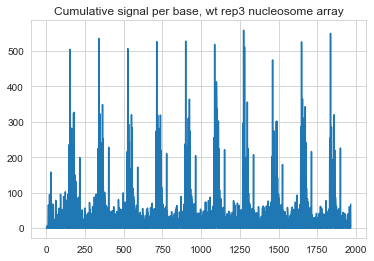

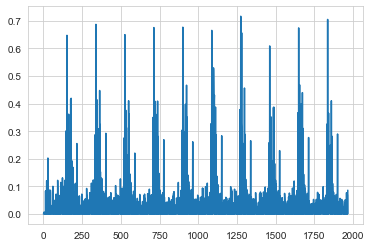

In [36]:
sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), y = np.cumsum(wt_rep3_nucarray, axis = 0)[779,:])
plt.title("Cumulative signal per base, wt rep3 nucleosome array")
plt.show()
#the last line of the array contains the cumulative occupation per base

sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), y = np.mean(wt_rep3_nucarray, axis = 0))
plt.show()

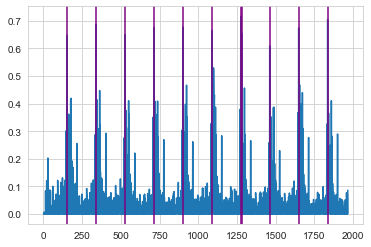

In [37]:
peaks = np.where(np.mean(wt_rep3_nucarray, axis = 0) >0.6)

sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), y = np.mean(wt_rep3_nucarray, axis = 0))
for position in peaks[0]:
    plt.axvline(position, color = "purple")
plt.show()

In [38]:
np.gradient(peaks[0]).mean()

170.0

Text(0.5, 1.0, 'wt rep nuc array')

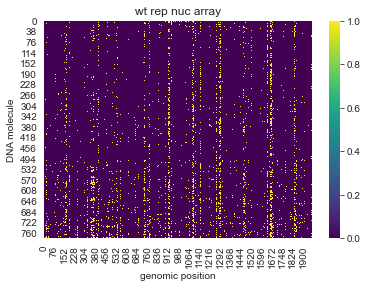

In [39]:
#heatmap of the wt raw data
sns.heatmap(wt_rep3_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("wt rep nuc array")

### Test differrent window sizes for smoothing

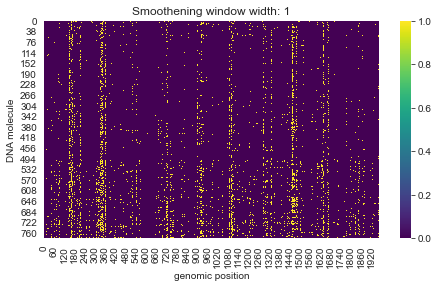

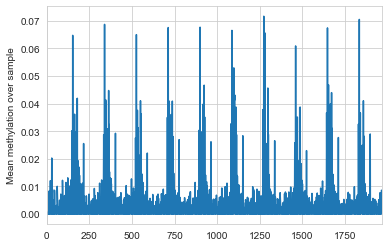

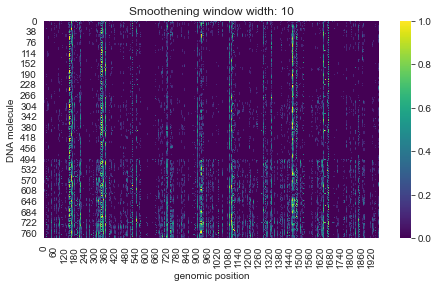

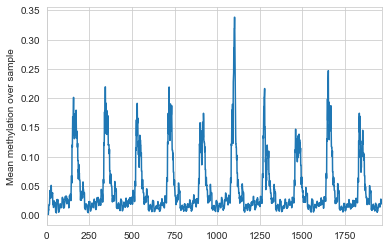

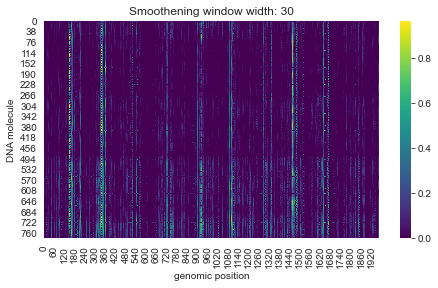

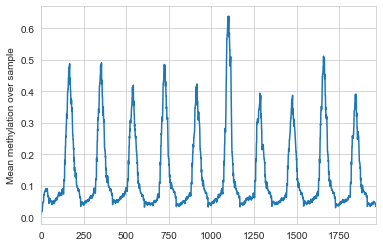

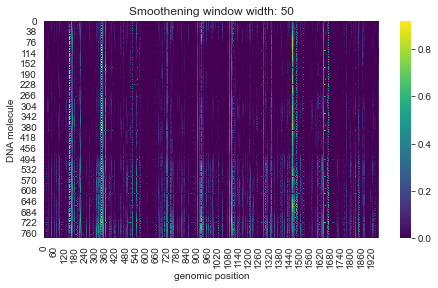

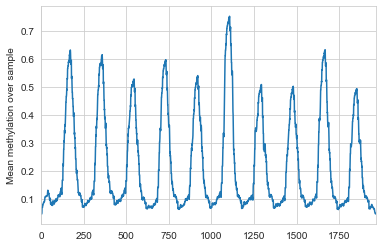

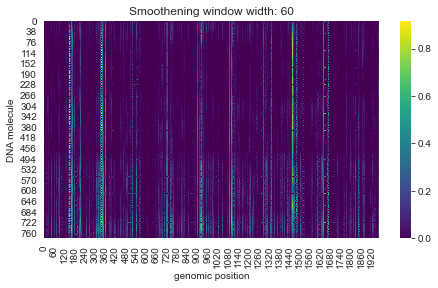

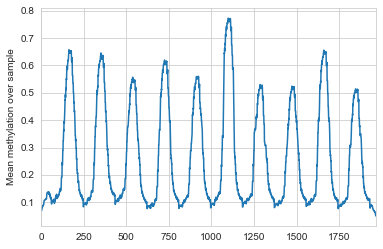

In [40]:
#calculate a sliding mean for each molecule
np.convolve(wt_rep3_nucarray[0,:], np.ones(10)/10, mode='same').shape

#N = 20 #smoothening window

#def smooth(array):
 #   return np.convolve(array, np.ones(N)/N, mode = "same")

for N in [1, 10, 30, 50, 60]:
    
    def smooth(array):
        return np.convolve(array, np.ones(N)/N, mode = "same")
    
    wt_nucarray_smooth = np.apply_along_axis(smooth, 0, wt_rep3_nucarray)
    
    plt.figure(figsize=(7.5,4))
    sns.heatmap(wt_nucarray_smooth, cmap = "viridis")
    plt.xlabel("genomic position")
    plt.ylabel("DNA molecule")
    plt.xlim(0, 1966)
    plt.title("Smoothening window width: " + str(N))
    plt.show()

    sns.lineplot(x = range(wt_nucarray_smooth.shape[1]), 
                 y = np.convolve(wt_nucarray_smooth.mean(axis = 0), np.ones(N)/10, mode ="same")
                )
    plt.ylabel("Mean methylation over sample")
    plt.xlim(0, 1966)
    plt.show()

In [41]:
# load the other replicate, and the counts from the mutants:

wt_rep2_nucarray = np.loadtxt("controls/mat_Megalodon_repII_in_vitro_nucl_array.txt")

dies6_rep1_nucarray = np.loadtxt("controls/DIES6_ALL_REP1_in_vitro_nucl_array.txt")
dies6_rep2_nucarray = np.loadtxt("controls/DIES6_REP2_780READS_in_vitro_nucl_array.txt")

disw2_rep1_nucarray = np.genfromtxt("controls/array_disw2_rep1_780READS_noNA.csv",
                                   dtype = int, delimiter = ",")

#disw2_rep2_nucarray = np.genfromtxt("controls/array_disw2_rep2_780READS_noNA.csv",
#                                   dtype = int, delimiter = ",")
#delete the first three columns as they come from linker DNA 
#disw2_rep2_nucarray_trimmed = disw2_rep2_nucarray[:, 30:]
#np.savetxt("controls/array_disw2_rep2_780READS_noNA_cleaned.csv", disw2_rep2_nucarray_trimmed)#

disw2_rep2_nucarray = np.loadtxt("controls/array_disw2_rep2_780READS_noNA_cleaned.csv")

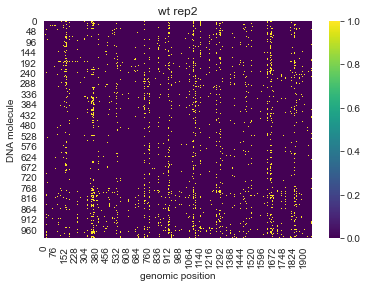

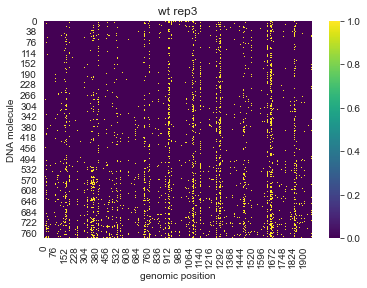

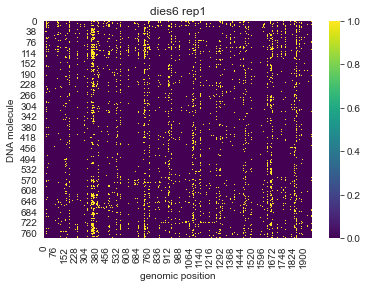

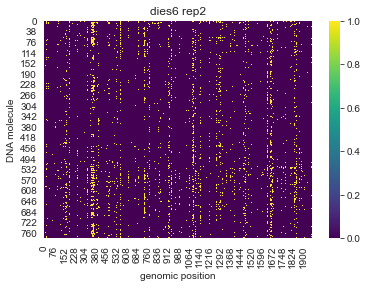

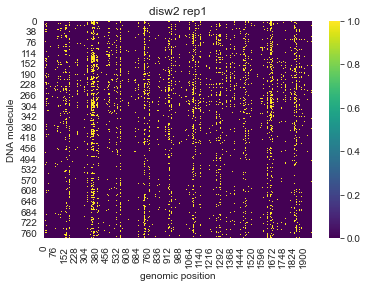

Text(0.5, 1.0, 'disw2 rep2')

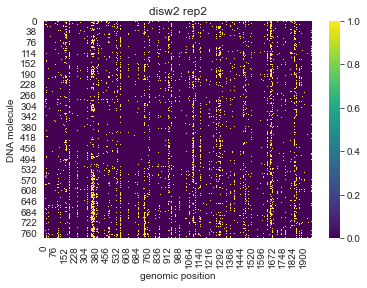

In [42]:
sns.heatmap(wt_rep2_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("wt rep2")
plt.show()

sns.heatmap(wt_rep3_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("wt rep3")
plt.show()

sns.heatmap(dies6_rep1_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("dies6 rep1")
plt.show()

sns.heatmap(dies6_rep2_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("dies6 rep2")
plt.show()

sns.heatmap(disw2_rep1_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("disw2 rep1")
plt.show()

sns.heatmap(disw2_rep2_nucarray, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("disw2 rep2")

### compare replicates smoothed mean and variance of wildtype and mutants dies6 and disw2

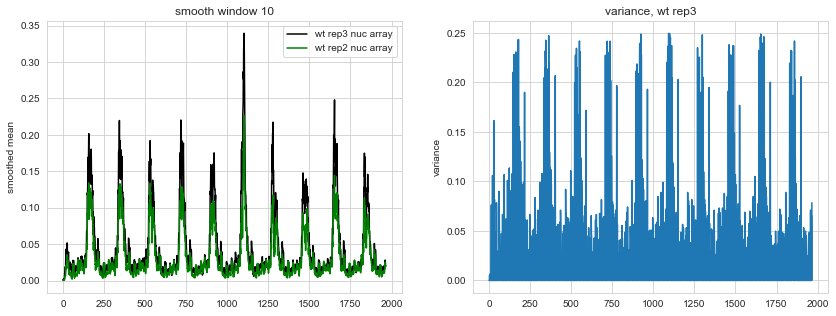

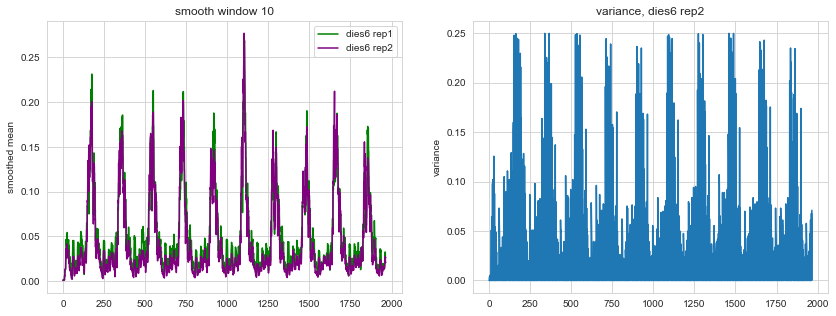

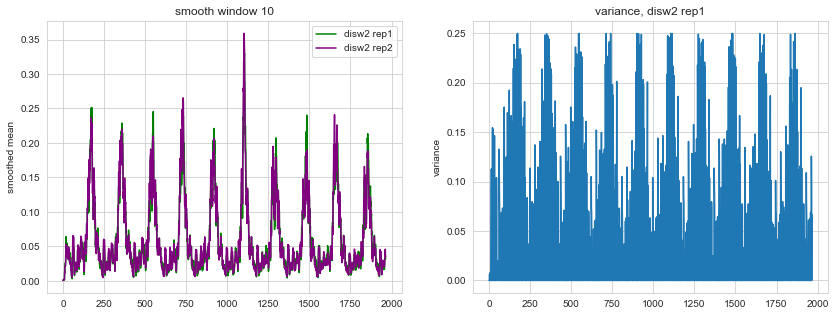

wt:  3.6679572617529154e-102
dies6:  5.234857328878377e-57
disw2:  0.02275886341794949


In [43]:
smooth = 10

#wildtype
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))
sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = np.convolve(wt_rep3_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "black", label = "wt rep3 nuc array", ax = ax1)
sns.lineplot(x = range(wt_rep2_nucarray.shape[1]), 
                 y = np.convolve(wt_rep2_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "green", label = "wt rep2 nuc array", ax = ax1)
ax1.set_ylabel("smoothed mean")
ax1.set_title("smooth window " + str(smooth))

sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = wt_rep3_nucarray.std(axis = 0)**2, ax = ax2)
plt.ylabel("variance")
ax2.set_title("variance, wt rep3")
plt.show()

#DIES6
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))
sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = np.convolve(dies6_rep1_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "green", label = "dies6 rep1", ax = ax1)
sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = np.convolve(dies6_rep2_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "purple", label = "dies6 rep2", ax = ax1)
ax1.set_ylabel("smoothed mean")
ax1.set_title("smooth window " + str(smooth))

sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = dies6_rep2_nucarray.std(axis = 0)**2, ax = ax2)
plt.ylabel("variance")
ax2.set_title("variance, dies6 rep2")
plt.show()

#DISW2
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))
sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = np.convolve(disw2_rep1_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "green", label = "disw2 rep1", ax = ax1)
sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = np.convolve(disw2_rep2_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same"),
             color = "purple", label = "disw2 rep2", ax = ax1)
ax1.set_ylabel("smoothed mean")
ax1.set_title("smooth window " + str(smooth))

sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = disw2_rep1_nucarray.std(axis = 0)**2, ax = ax2)
plt.ylabel("variance")
ax2.set_title("variance, disw2 rep1")
plt.show()

print("wt: ", wilcoxon(wt_rep3_nucarray.mean(axis = 0), wt_rep2_nucarray.mean(axis =0), 
               alternative ="two-sided").pvalue)
print("dies6: ", wilcoxon(dies6_rep1_nucarray.mean(axis = 0), dies6_rep2_nucarray.mean(axis =0), 
               alternative ="two-sided").pvalue)
print("disw2: ", wilcoxon(disw2_rep1_nucarray.mean(axis = 0), disw2_rep2_nucarray.mean(axis =0), 
               alternative ="two-sided").pvalue)

In [44]:
wt_rep3_smooth_mean = np.convolve(wt_rep3_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")
wt_rep2_smooth_mean = np.convolve(wt_rep2_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")
dies6_rep1_smooth_mean = np.convolve(dies6_rep1_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")
dies6_rep2_smooth_mean = np.convolve(dies6_rep2_nucarray.mean(axis = 0), np.ones(smooth)/smooth, mode ="same")

means_nucarray = np.concatenate((wt_rep3_smooth_mean.reshape(1, 1966),
                                 wt_rep2_smooth_mean.reshape(1, 1966),
                              dies6_rep1_smooth_mean.reshape(1, 1966),
                              dies6_rep2_smooth_mean.reshape(1, 1966)),
                              axis = 0)

w, p = wilcoxon(means_nucarray[2,:], means_nucarray[3,:], alternative = "two-sided")
print("Comparing dies6 replicates after smoothing: ", w,p)

#the statistical test shows that the replicates of the mutants are rather different: 
w_2, p_2 = wilcoxon(dies6_rep1_nucarray.mean(axis = 0), 
                    dies6_rep2_nucarray.mean(axis = 0), alternative = "two-sided") #p-value 5.23 * e-57
print("comparing dies6 replicates: ", w_2, p_2)

#disw2 replicates pass the statistical test for being similar:
w_3, p_3 = wilcoxon(disw2_rep1_nucarray.mean(axis = 0), 
                    disw2_rep2_nucarray.mean(axis = 0), alternative = "two-sided")
print(w_3, p_3)

#disw2 replicates pass the statistical test for being similar:
w_4, p_4 = wilcoxon(wt_rep3_nucarray.mean(axis = 0), 
                    wt_rep2_nucarray.mean(axis = 0), alternative = "two-sided")
print("Comparing wild-type replictes: ", w_4, p_4)

Comparing dies6 replicates after smoothing:  240845.0 5.311775211271692e-182
comparing dies6 replicates:  83049.0 5.234857328878377e-57
193039.5 0.02275886341794949
Comparing wild-type replictes:  44512.0 3.6679572617529154e-102


## Check the negative control: "naked plasmid"

#### purified plasmid was added after locus purification. should have ~uniform methylation

In [45]:
ls controls/

DIES6_ALL_REP1_in_vitro_nucl_array.txt
DIES6_ALL_REP1_naked_plasmid.txt
DIES6_REP2_780READS_in_vitro_nucl_array.txt
DIES6_rep2_780READS_naked_plasmid.txt
array_disw2_rep1_780READS_noNA.csv
array_disw2_rep2_780READS_noNA.csv
array_disw2_rep2_780READS_noNA_cleaned.csv
in_vitro_nucl_array_(31 .. 2214).fa
mat_Megalodon_repII_in_vitro_nucl_array.txt
naked_plasmid.fa
naked_plasmid_disw2_rep1_780READS.csv
naked_plasmid_disw2_rep2_clean_780_reads.csv
naked_plasmid_wt_rep2_1000reads.txt
unused_csvs/
wt_mat_Megalodon_repIII_in_vitro_nucl_array.txt
wt_mat_Megalodon_repIII_naked_plasmid.txt


In [46]:
wt_rep3_naked_plasmid = np.loadtxt("controls/wt_mat_Megalodon_repIII_naked_plasmid.txt")
#wt_rep2_naked_plasmid = np.loadtxt("controls/mat_Megalodon_repII_naked_plasmid.txt")

In [47]:
set(wt_rep3_naked_plasmid.flatten())
np.isnan(wt_rep3_naked_plasmid).sum()

wt_rep3_naked_plasmid.mean(axis = 0)

array([0.        , 0.        , 0.67820513, ..., 0.00769231, 0.00384615,
       0.02435897])

In [48]:
def entropy(labels, base=None):
    base = math.e if base is None else base
    _ ,counts = np.unique(labels, return_counts=True)
    norm_counts = counts / counts.sum()

    return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()

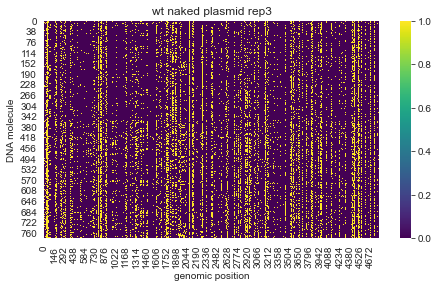

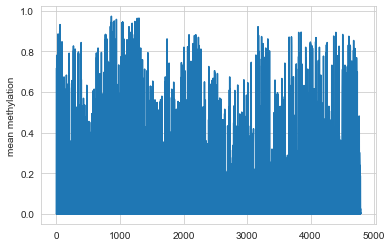

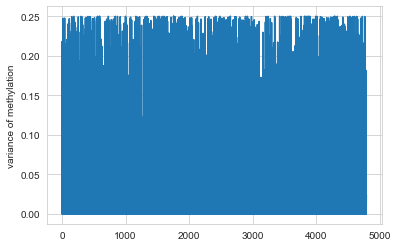

<AxesSubplot:title={'center':'naked plasmid wt rep3, entropy per position'}, ylabel='entropy'>

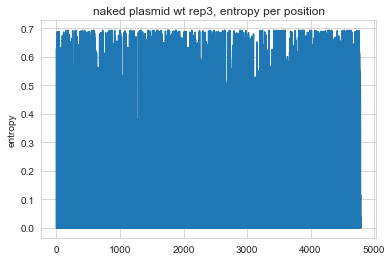

In [49]:
plt.figure(figsize=(7.5,4))
sns.heatmap(wt_rep3_naked_plasmid, cmap = "viridis")
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
plt.title("wt naked plasmid rep3")
plt.show()

sns.lineplot(x = range(wt_rep3_naked_plasmid.shape[1]), 
             y = wt_rep3_naked_plasmid.mean(axis = 0))
plt.ylabel("mean methylation")
plt.show()

sns.lineplot(x = range(wt_rep3_naked_plasmid.shape[1]), 
             y = wt_rep3_naked_plasmid.std(axis = 0)**2)
plt.ylabel("variance of methylation")
plt.show()

g = sns.lineplot(x = range(wt_rep3_naked_plasmid.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, wt_rep3_naked_plasmid))
g.set_ylabel("entropy")
g.set_title("naked plasmid wt rep3, entropy per position")
#g.set_xticks(range(0, ARS305_wt.shape[1], 50))
g

<AxesSubplot:title={'center':'nucarray wt rep3, entropy per position'}, ylabel='entropy'>

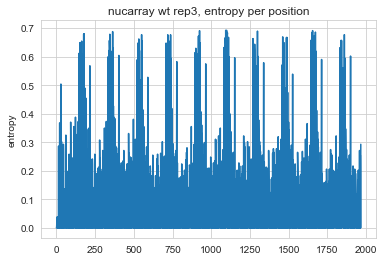

In [50]:
g = sns.lineplot(x = range(wt_rep3_nucarray.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, wt_rep3_nucarray))
g.set_ylabel("entropy")
g.set_title("nucarray wt rep3, entropy per position")
g

In [95]:
### Cleaning two of the files for "naked plasmid" : removing NAs and non binary counts:

#wt_rep2_naked_plasmid = pd.read_csv("controls/mat_Megalodon_repII_naked_plasmid.txt", sep= "\t", header=None)
#wt_rep2_naked_plasmid.drop(columns = [4791, 4792, 4793], inplace = True)
#clean_df = wt_rep2_naked_plasmid.loc[:999,]

#clean_array = clean_df.values
#np.savetxt("controls/naked_plasmid_wt_rep2_1000reads.txt", clean_array)

#clean_disw2 = pd.read_csv("controls/unused_csvs/naked_plasmid_disw2_rep2_780READS_noNA.csv", header = None)
#clean_disw2.drop(columns = range(4791, 4795), inplace = True)
#clean_array2 = clean_disw2.loc[:779,].values

#np.savetxt("controls/naked_plasmid_disw2_rep2_clean_780_reads.csv", clean_array2)

#disw2_rep1_naked = np.genfromtxt("controls/naked_plasmid_disw2_rep1_780READS.csv",
#                                        dtype = int, delimiter = ",")
#clean_array3 = disw2_rep1_naked[:780,:4791]
#np.savetxt("controls/naked_plasmid_disw2_rep1_clean_780READS.csv", clean_array3)

In [97]:
## How do the mutants change the variability of methylation for the "naked plasmid" ?
wt_rep2_naked_plasmid = np.loadtxt("controls/naked_plasmid_wt_rep2_1000reads.txt")

dies6_rep1_naked = np.loadtxt("controls/DIES6_ALL_REP1_naked_plasmid.txt")
dies6_rep2_naked = np.loadtxt("controls/DIES6_rep2_780READS_naked_plasmid.txt")

disw2_rep1_naked = np.loadtxt("controls/naked_plasmid_disw2_rep1_clean_780READS.csv")
disw2_rep2_naked = np.loadtxt("controls/naked_plasmid_disw2_rep2_clean_780_reads.csv")

Text(0.5, 1.0, 'naked plasmid wt rep2, entropy per position')

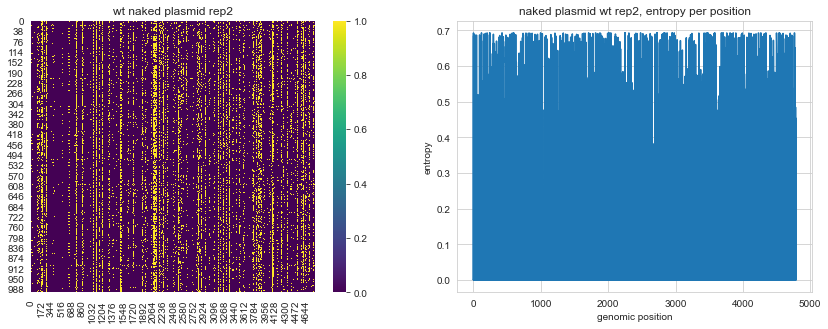

In [102]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (14,5))

#sns.set(rc={'figure.figsize':(14, 5)})
sns.heatmap(wt_rep2_naked_plasmid, cmap = "viridis", ax =ax1)
plt.xlabel("genomic position")
plt.ylabel("DNA molecule")
ax1.set_title("wt naked plasmid rep2")

sns.set_style("whitegrid")
sns.lineplot(x = range(wt_rep2_naked_plasmid.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, wt_rep2_naked_plasmid), ax = ax2)
plt.ylabel("entropy")
ax2.set_title("naked plasmid wt rep2, entropy per position")

<AxesSubplot:title={'center':'naked plasmid disw2 rep1, entropy per position'}, ylabel='entropy'>

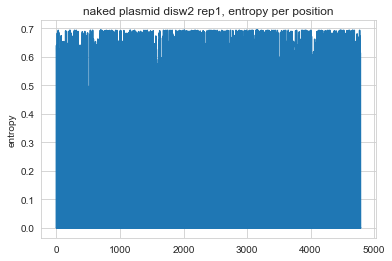

In [103]:
g = sns.lineplot(x = range(disw2_rep1_naked.shape[1]), 
                 y = np.apply_along_axis(entropy, 0, disw2_rep1_naked))
g.set_ylabel("entropy")
g.set_title("naked plasmid disw2 rep1, entropy per position")
g